Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Azat Vakhitov | 12148222 | 23.01.2023, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 6 (Assignment) &ndash; Convolutional Neural Networks</h2>

<b>Authors:</b> Brandstetter, Schäfl, Schlüter, Rumetshofer, Schörgenhumer<br>
<b>Date:</b> 09-01-2023

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u6_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u6_utils.py</code> need to be installed.

<div class="alert alert-warning">
    <b>Important:</b> When specifying a seed for the sources of randomness, use the <code>u6.set_seed(seed=XYZ)</code> function.
</div>

In [56]:
# Required packages and the u6_utils file
import u6_utils as u6
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
import torch

u6.check_module_versions()

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u6.setup_jupyter()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.21.5 (✓)
Installed pandas version: 1.4.2 (✓)
Installed scikit-learn version: 1.0.2 (✓)
Installed matplotlib version: 3.5.1 (✓)
Installed seaborn version: 0.11.2 (✓)
Installed torch version: 1.13.0 (✓)
Installed tqdm version: 4.64.0 (✓)
Installed cv2 version: 4.7.0 (✓)


<h2>Exercise 1</h2>

Similar to the Sobel filter presented in the lecture, apply two other operators (<b>Prewitt</b> and <b>Scharr</b>) to an image for the horizontal and the vertical approximations of the derivatives of the image intensity function. Perfom the following tasks:

<div class="alert alert-warning">
    <b>Exercise 1.1. [2 Points]</b>
    <ul>
        <li>Load a picture of a road (<code>white_lines.jpg</code>), convert it to grayscale and plot the grayscale image to see what it looks like.</li>
    </ul>
</div>

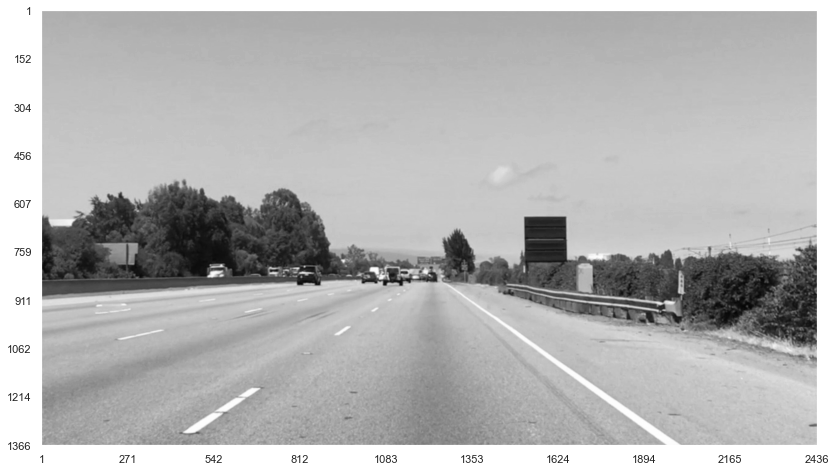

In [57]:
image = plt.imread("resources/white_lines.jpg")
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
u6.show_image(image)

<div class="alert alert-warning">
    <b>Exercise 1.2. [2 Points]</b>
    <ul>
        <li>Define the two Prewitt operators as numpy arrays:

\begin{equation}P_x = \left[
    \begin{array}{rrr}                                
        1 & 0 & -1 \\
        1 & 0 & -1 \\
        1 & 0 & -1 \\
    \end{array}\right]
\end{equation}

\begin{equation}P_y = \left[
    \begin{array}{rrr}                                
        1 & 1 & 1 \\
        0 & 0 & 0 \\
        -1 & -1 & -1 \\
    \end{array}\right]
\end{equation}</li>
    </ul>
</div>

In [58]:
prewitt_x = np.array([
    [ 1,  0, -1],
    [ 1,  0, -1],
    [ 1,  0, -1]
])
prewitt_y = np.array([
    [ 1, 1, 1],
    [ 0, 0, 0],
    [ -1, -1, -1]
])

<div class="alert alert-warning">
    <b>Exercise 1.3. [3 Points]</b>
    <ul>
        <li>Apply the two Prewitt operators $P_x$ and $P_y$ to the grayscale version of the above image and plot the results.</li>
    </ul>
</div>

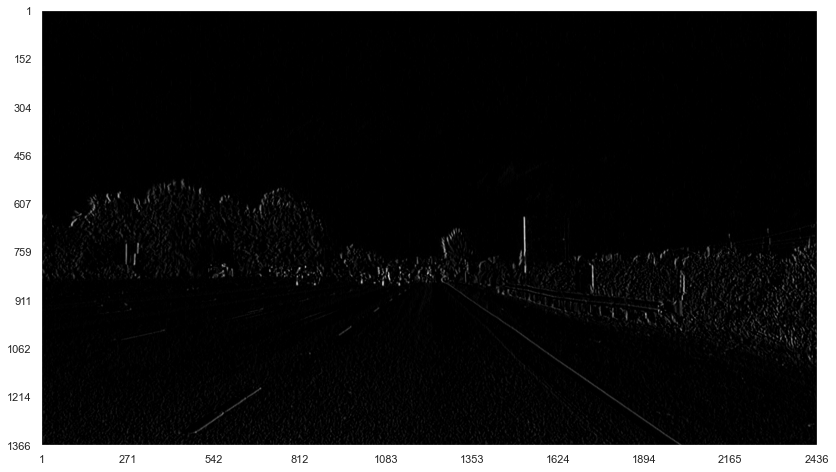

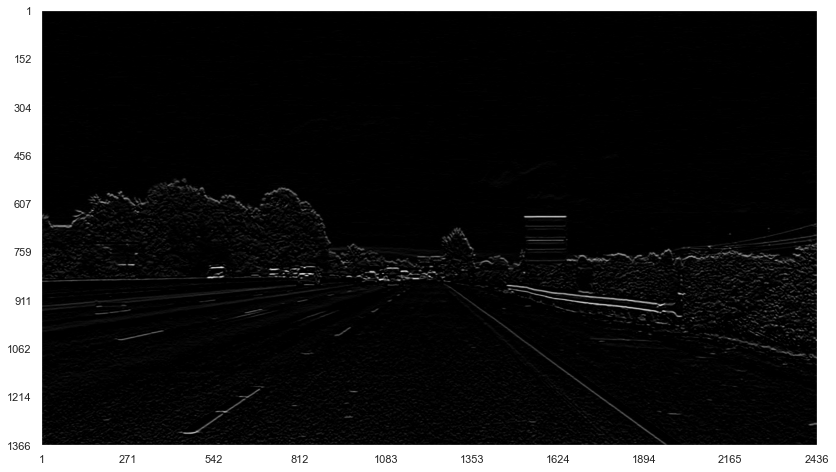

In [59]:
filtered_image = cv2.filter2D(image, -1, prewitt_x)  # add [1:-1, 1:-1] to extract the unpadded data
u6.show_image(filtered_image)
filtered_image = cv2.filter2D(image, -1, prewitt_y)  # add [1:-1, 1:-1] to extract the unpadded data
u6.show_image(filtered_image)

<div class="alert alert-warning">
    <b>Exercise 1.4. [3 Points]</b>
    <ul>
        <li>Which parts of the resulting images above are highlighted? Do you observe any differences between the two Prewitt operators?</li>
    </ul>
</div>

your answer goes here

<div class="alert alert-warning">
    <b>Exercise 1.5. [2 Points]</b>
    <ul>
        <li>Define the two Scharr operators as numpy arrays:

\begin{equation}S_x = \left[
    \begin{array}{rrr}                                
        47 & 0 & -47 \\
        162 & 0 & -162 \\
        47 & 0 & -47 \\
    \end{array}\right]
\end{equation}

\begin{equation}S_y = \left[
    \begin{array}{rrr}                                
        47 & 162 & 47 \\
        0 & 0 & 0 \\
        -47 & -162 & -47 \\
    \end{array}\right]
\end{equation}</li>
    </ul>
</div>

In [60]:
scharr_x = np.array([
    [ 47,  0, -47],
    [ 162,  0, -162],
    [ 47,  0, -47]
])
scharr_y = np.array([
    [ 47, 162, 47],
    [ 0, 0, 0],
    [ -47, -162, -47]
])

<div class="alert alert-warning">
    <b>Exercise 1.6. [3 Points]</b>
    <ul>
        <li>Apply the two operators $S_x$ and $S_y$ to the grayscale version of the above image and plot the results.</li>
    </ul>
</div>

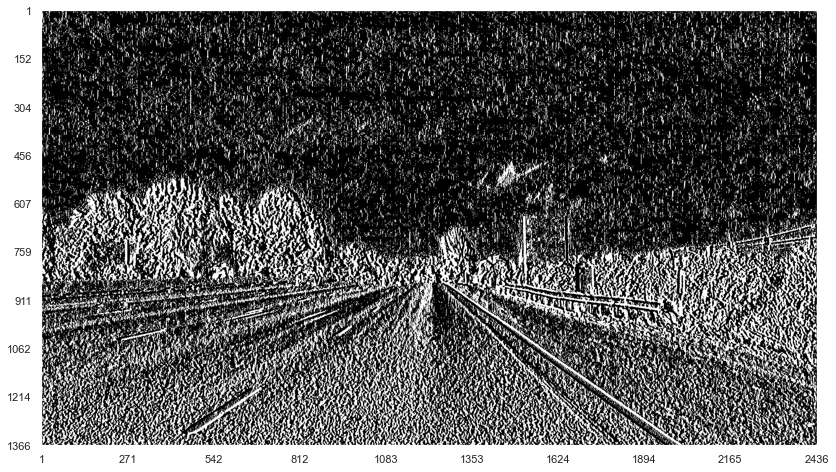

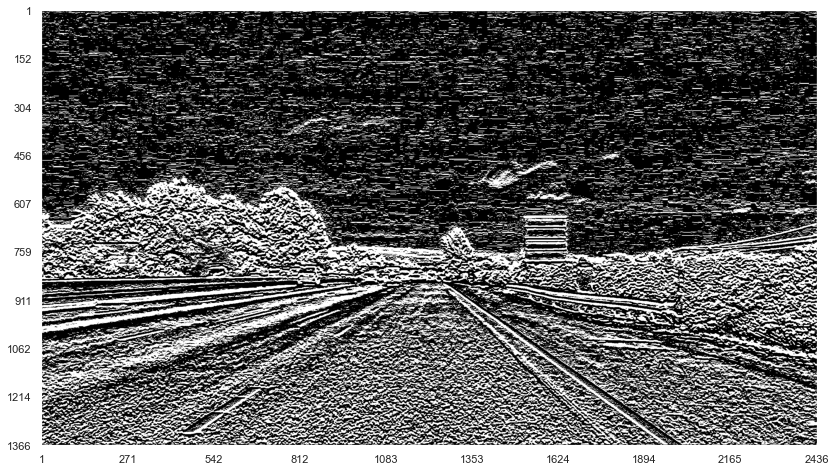

In [61]:
filtered_image = cv2.filter2D(image, -1, scharr_x)  # add [1:-1, 1:-1] to extract the unpadded data
u6.show_image(filtered_image)
filtered_image = cv2.filter2D(image, -1, scharr_y)  # add [1:-1, 1:-1] to extract the unpadded data
u6.show_image(filtered_image)

<div class="alert alert-warning">
    <b>Exercise 1.7. [3 Points]</b>
    <ul>
        <li>Which parts of the resulting images above are highlighted? Do you observe any differences between the two Scharr operators?</li>
    </ul>
</div>

your answer goes here

<div class="alert alert-warning">
    <b>Exercise 1.8. [2 Points]</b>
    <ul>
        <li>Do you observe any differences between the Prewitt and the Scharr operators?</li>
    </ul>
</div>

your answer goes here

<h2>Exercise 2</h2>

Up until now, custom filters were defined and applied on images, but as you certainly noticed, no neural network was involed so far. The gist of this exercise is to change that and get more insight into how <b>convolutional neural networks</b> operate. For this reason, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 2.1. [4 Points]</b>
    <ul>
        <li>Define a custom filter as a numpy array:

\begin{equation}F = \left[
    \begin{array}{rrrrr}                                
        1 &    1 &    1 &     1 &  0 \\
        1 & 0.75 &  0.5 &     0 & -1 \\
        1 &  0.5 &    0 &  -0.5 & -1 \\
        1 &    0 & -0.5 & -0.75 & -1 \\
        0 &   -1 &   -1 &    -1 & -1
    \end{array}\right]
\end{equation}</li>
        <li>Create three additional copies of the custom filter and apply the following transformations: negation, rotation by $90$ degrees, negation + rotation by $90$ degrees.</li>
        <li>Visualize all four filters.</li>
        <li>Hint: You can rotate a numpy array by $90$ degrees with <code>np.rot90(some_array)</code>.</li>
        <li>Hint: Your final array of filters should be of the form $\left[F, -F, F_{rot}, -F_{rot}\right]$.</li>
    </ul>
</div>

Filter shape: (5, 5)


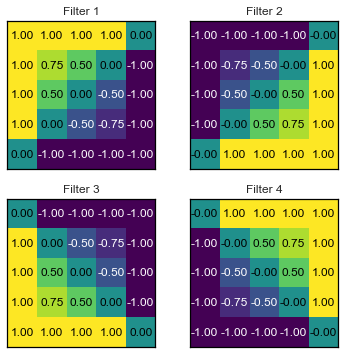

In [62]:
# Define filter 1
filter_1 = np.array([
    [1 , 1 , 1 , 1 , 0], 
    [1 , 0.75 , 0.5 , 0 , -1], 
    [1 , 0.5 , 0 , -0.5 , -1], 
    [1 , 0 , -0.5 , -0.75 , -1], 
    [0 , -1 , -1 , -1 , -1]
])
filter_2 = -filter_1
filter_3 = np.rot90(filter_1)
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

u6.visualize_filters(filters)
print(f"Filter shape: {filter_1.shape}")

<div class="alert alert-warning">
    <b>Exercise 2.2. [4 Points]</b>
    <ul>
        <li>Which structures do you think these filters might detect?</li>
    </ul>
</div>

your answer goes here

<div class="alert alert-warning">
    <b>Exercise 2.3. [2 Points]</b>
    <ul>
        <li>Create and initialize a neural network of type <code>u6.InitializedNet</code> using the four filters.</li>
        <li>Use ReLU as activation function.</li>
    </ul>
</div>

In [63]:
model = u6.InitializedNet(weights=filters, activation=torch.nn.ReLU())

<div class="alert alert-warning">
    <b>Exercise 2.4. [2 Points]</b>
    <ul>
        <li>Apply the neural network to the grayscale version of the image above to retrieve the layer outputs.</li>
        <li>In contrast to the previous tasks, use <code>get_grayscale_image_tensor</code> to load the image (again, <code>white_lines.jpg</code>).</li>
    </ul>
</div>

In [64]:
image_tensor = u6.get_grayscale_image_tensor(image)

<div class="alert alert-warning">
    <b>Exercise 2.5. [2 Points]</b>
    <ul>
        <li>Plot the output of the convolutional layer and the output of the activation layer.</li>
    </ul>
</div>

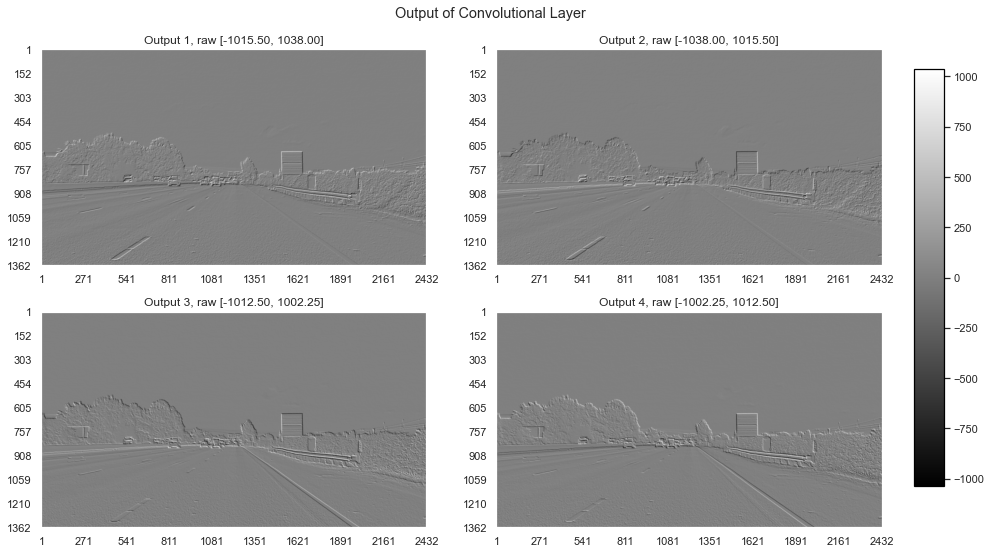

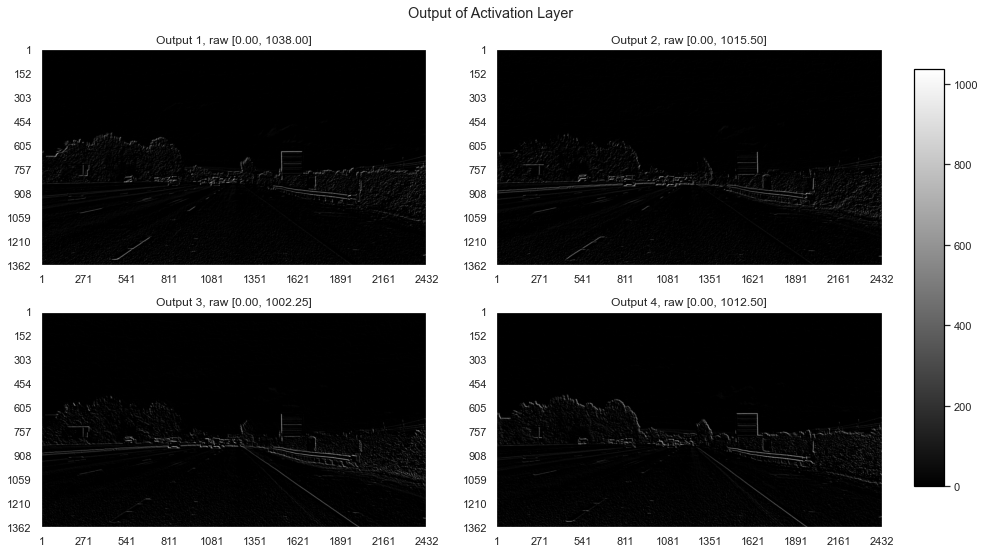

In [65]:
conv_layer, activated_layer,  _  = model(image_tensor)
# Visualize the outputs of these layers
u6.visualize_cnn_layer(conv_layer, title="Output of Convolutional Layer")
u6.visualize_cnn_layer(activated_layer, title="Output of Activation Layer")

<div class="alert alert-warning">
    <b>Exercise 2.6. [4 Points]</b>
    <ul>
        <li>Which parts of the image are highlighted? Do you observe any differences between the filters (with respect to each other) as well as between the two layers?</li>
    </ul>
</div>

your answer goes here

<h2>Exercise 3</h2>

In this exercise, we want to compare the output of a max pooling layer with the output of a strided convolution. Perform the following steps:

<div class="alert alert-warning">
    <b>Exercise 3.1. [4 Points]</b>
    <ul>
        <li>Create and initialize four neural networks of type <code>u6.InitializedNet</code> using the four filters from exercise 2.</li>
        <li>Use ReLU as activation function.</li>
        <li>Additionally, configure the following hyperparameters:</li>
        <ul>
            <li>Model 1: <b>max pooling</b> (parameter <code>max_pool_size</code>) with height/width = $2$, don't define a stride value.</li>
            <li>Model 2: <b>stride</b> (parameter <code>filter_stride</code>) = $2$, don't define a max pooling size.</li>
            <li>Model 3: <b>max pooling</b> with height/width = $8$, don't define a stride value.</li>
            <li>Model 4: <b>stride</b> = $8$, don't define a max pooling size.</li>
        </ul>
    </ul>
</div>

In [66]:
model_1 = u6.InitializedNet(weights=filters, max_pool_size=(2,2), activation=torch.nn.ReLU())
model_2 = u6.InitializedNet(weights=filters, filter_stride=2, activation=torch.nn.ReLU())
model_3 = u6.InitializedNet(weights=filters, max_pool_size=(8, 8), activation=torch.nn.ReLU())
model_4 = u6.InitializedNet(weights=filters, filter_stride = 8, activation=torch.nn.ReLU())

<div class="alert alert-warning">
    <b>Exercise 3.2. [4 Points]</b>
    <ul>
        <li>Apply the four neural networks to the grayscale version of the image above to retrieve the layer outputs.</li>
        <li>Use <code>get_grayscale_image_tensor</code> to load the image (again, <code>white_lines.jpg</code>).</li>
    </ul>
</div>

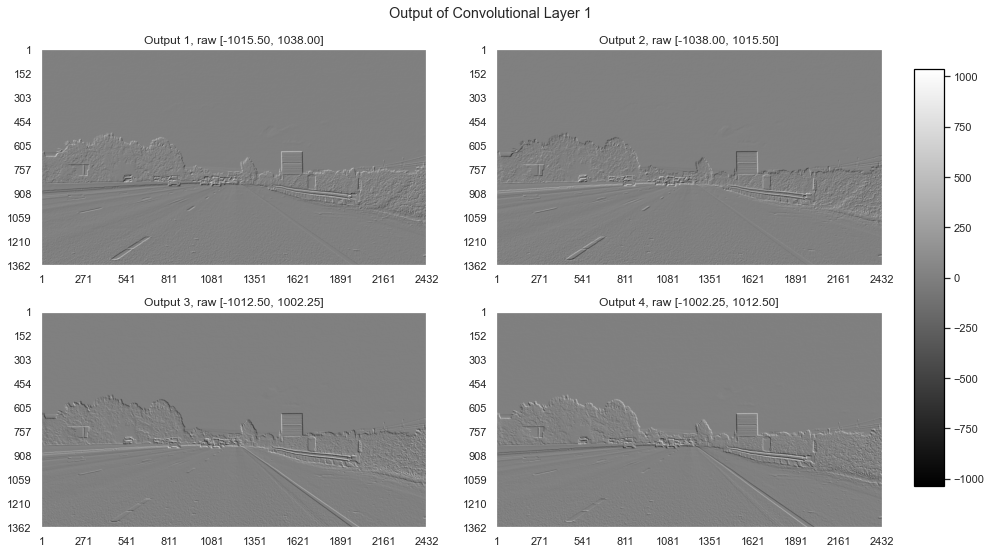

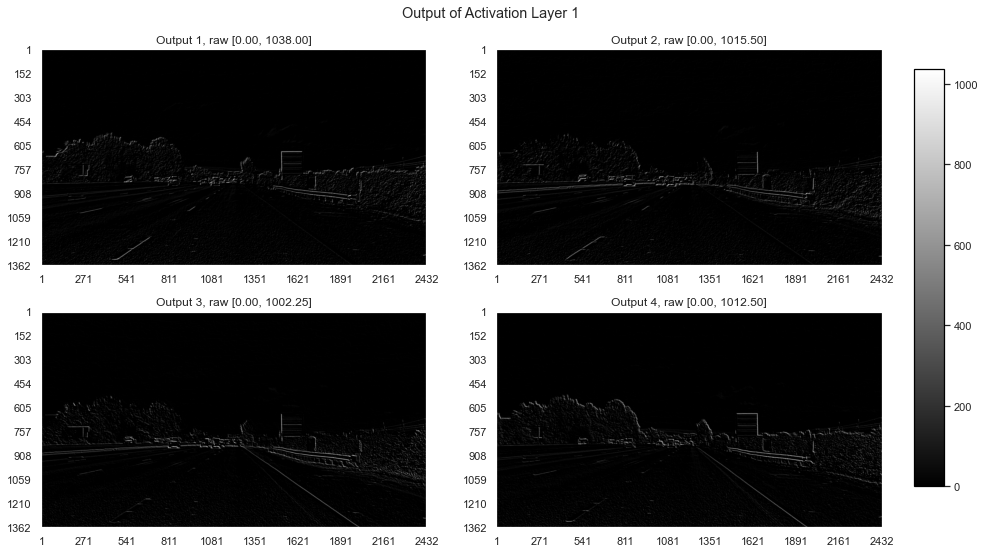

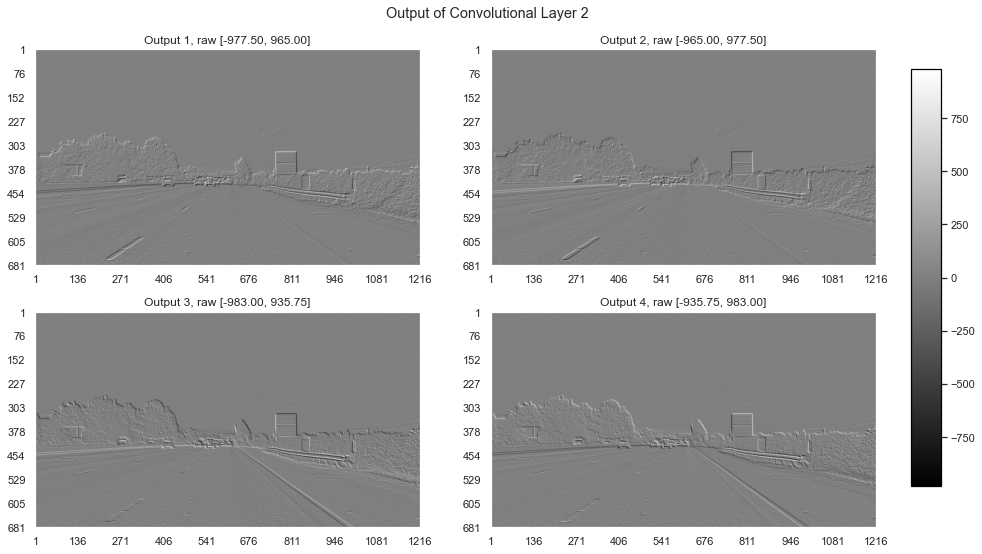

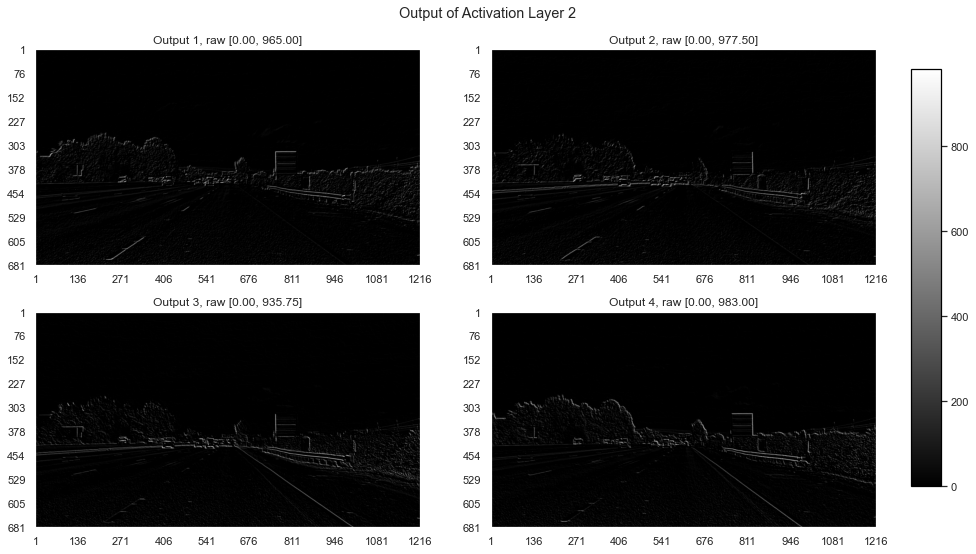

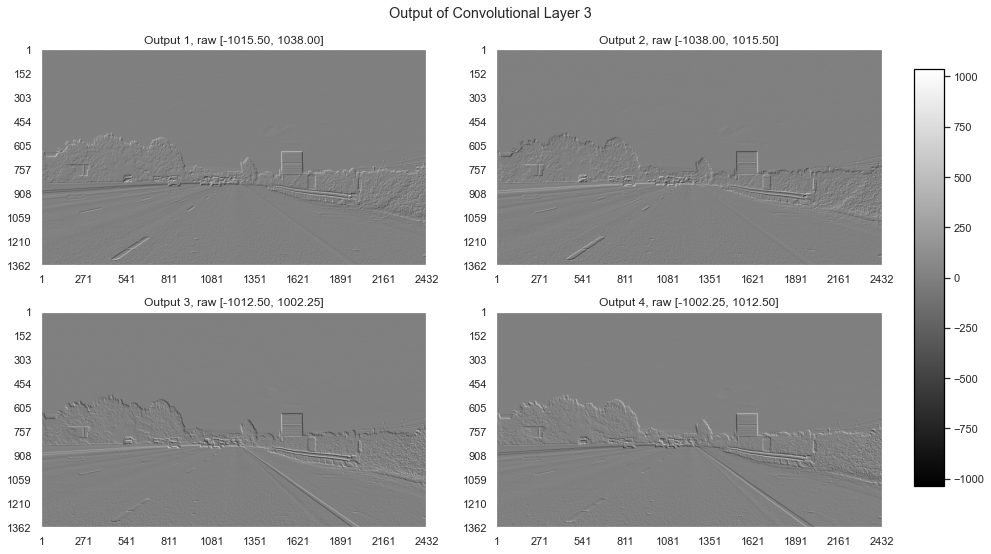

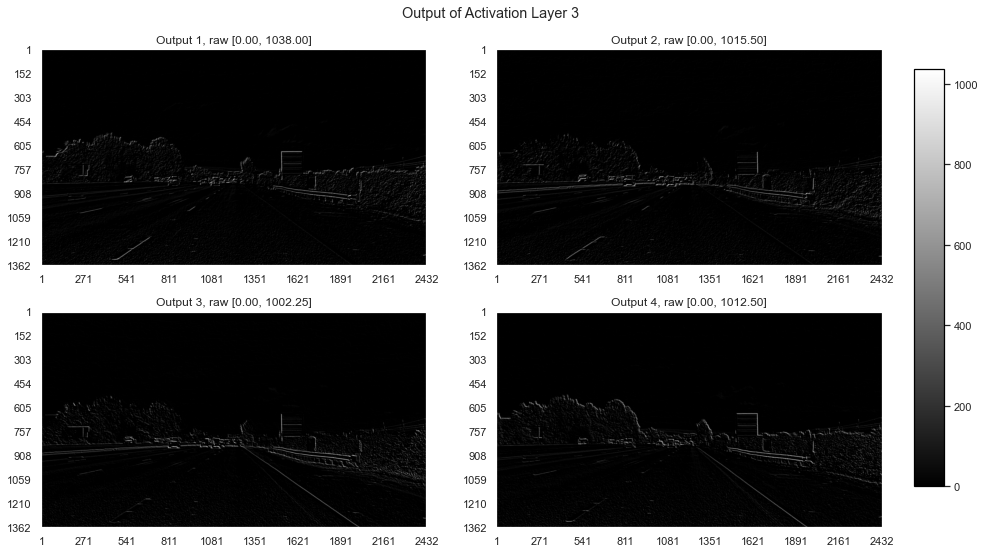

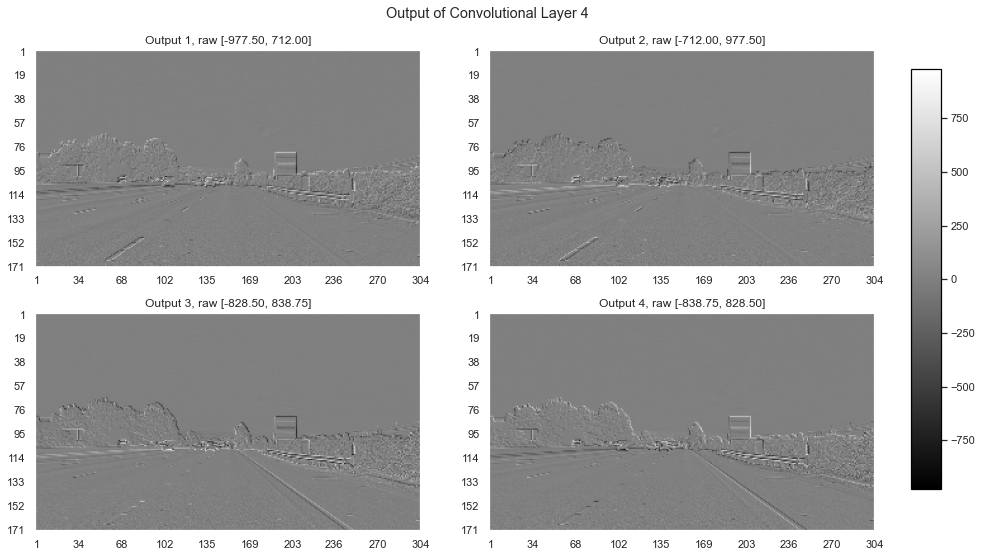

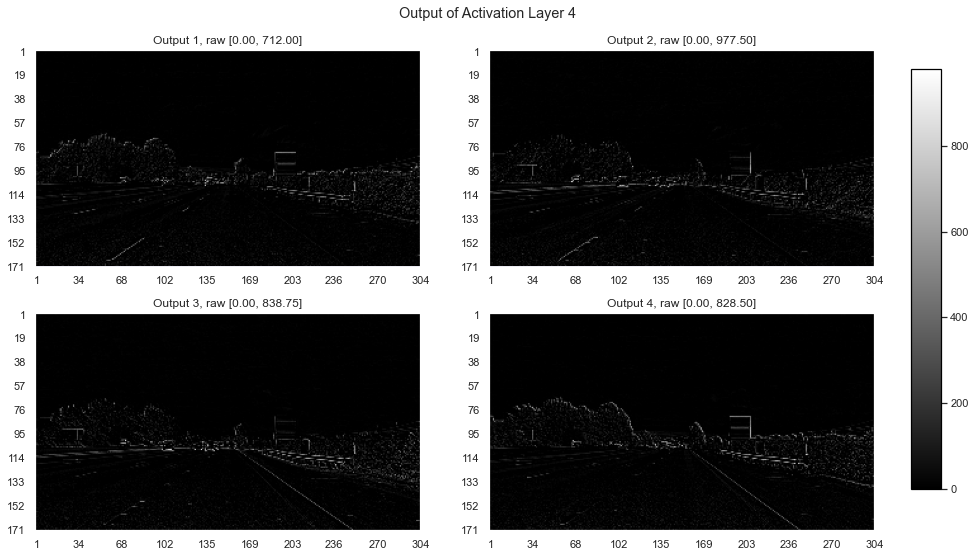

In [67]:
image_tensor = u6.get_grayscale_image_tensor(image)

conv_layer1, activated_layer1,  _  = model_1(image_tensor)
u6.visualize_cnn_layer(conv_layer1, title="Output of Convolutional Layer 1")
u6.visualize_cnn_layer(activated_layer1, title="Output of Activation Layer 1")

conv_layer2, activated_layer2,  _  = model_2(image_tensor)
u6.visualize_cnn_layer(conv_layer2, title="Output of Convolutional Layer 2")
u6.visualize_cnn_layer(activated_layer2, title="Output of Activation Layer 2")

conv_layer3, activated_layer3,  _  = model_3(image_tensor)
u6.visualize_cnn_layer(conv_layer3, title="Output of Convolutional Layer 3")
u6.visualize_cnn_layer(activated_layer3, title="Output of Activation Layer 3")

conv_layer4, activated_layer4,  _  = model_4(image_tensor)
u6.visualize_cnn_layer(conv_layer4, title="Output of Convolutional Layer 4")
u6.visualize_cnn_layer(activated_layer4, title="Output of Activation Layer 4")

<div class="alert alert-warning">
    <b>Exercise 3.3. [2 Points]</b>
    <ul>
        <li>Kernel size $2$ comparison: Plot the output of the max pooling layer of model 1 and the output of the activation layer of model 2.</li>
        <li>When plotting, set <code>clip=True</code>. This cuts off values larger than 255 to yield a more brighter looking output. Note that this is purely for visualization purposes, the original values in the CNN are unchanged.</li>
    </ul>
</div>

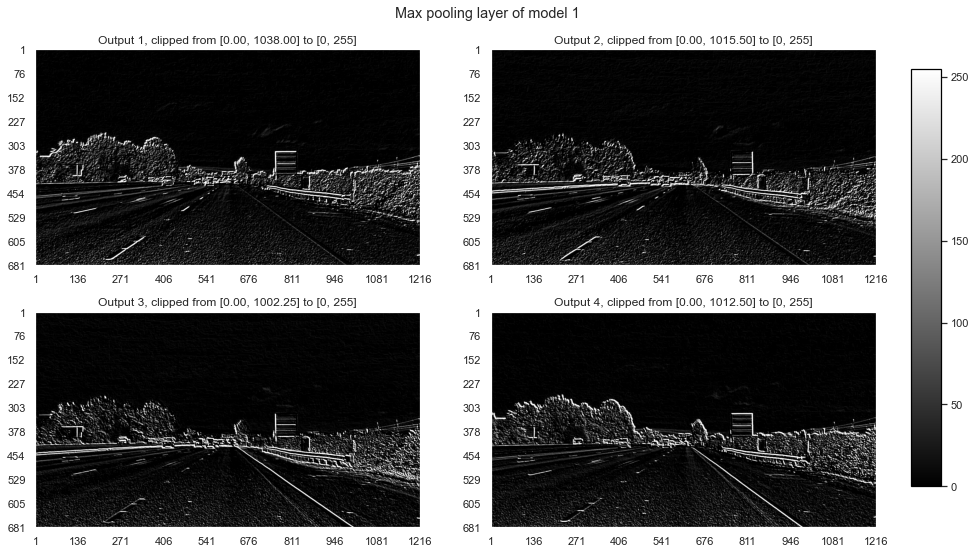

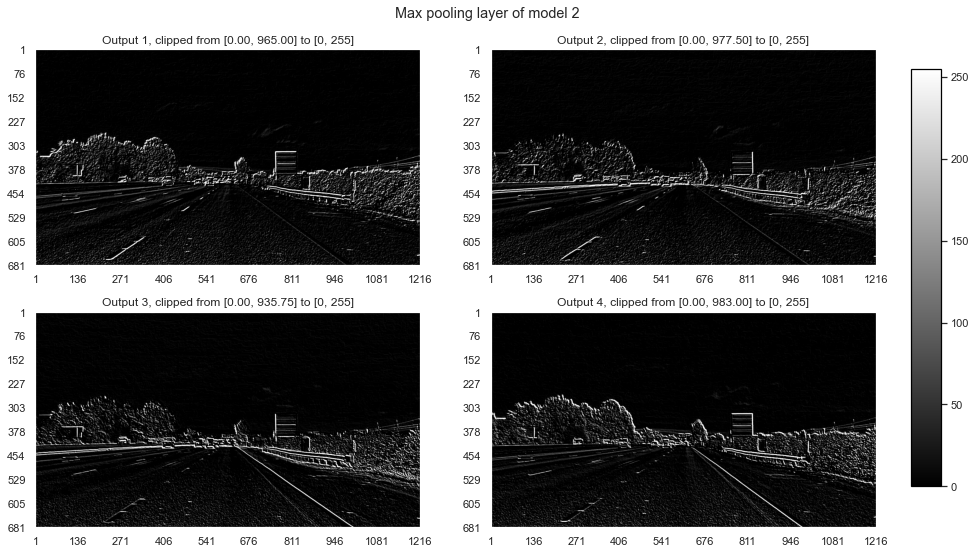

In [68]:
conv_layer, activated_layer, pooling_layer = model_1(image_tensor)
conv_layer2, activated_layer2, pooling_layer2 = model_2(image_tensor)
u6.visualize_cnn_layer(pooling_layer, title="Max pooling layer of model 1", clip=True)
u6.visualize_cnn_layer(activated_layer2, title="Max pooling layer of model 2", clip=True)

<div class="alert alert-warning">
    <b>Exercise 3.4. [2 Points]</b>
    <ul>
        <li>Kernel size $8$ comparison: Plot the output of the max pooling layer of model 3 and the output of the activation layer of model 4.</li>
        <li>When plotting, set <code>clip=True</code>. This cuts off values larger than 255 to yield a more brighter looking output. Note that this is purely for visualization purposes, the original values in the CNN are unchanged.</li>
    </ul>
</div>

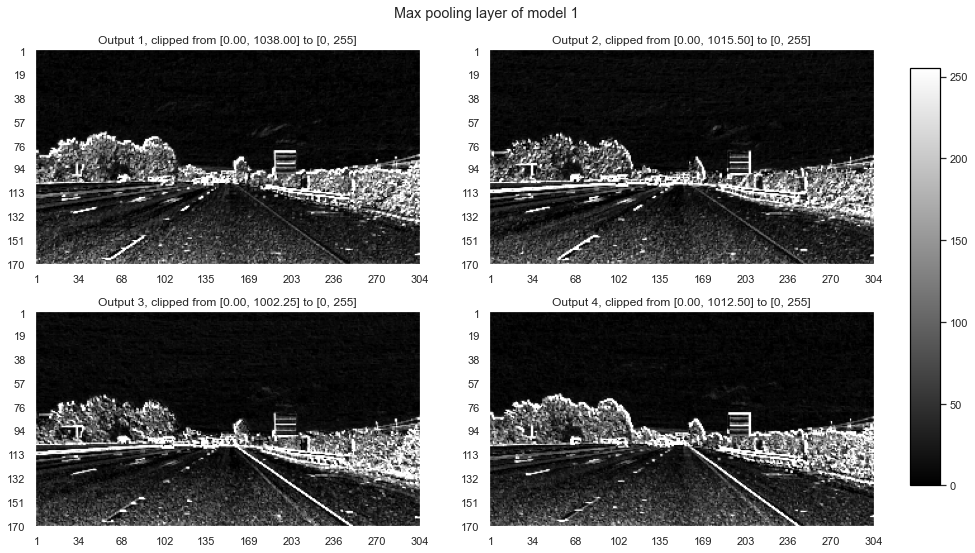

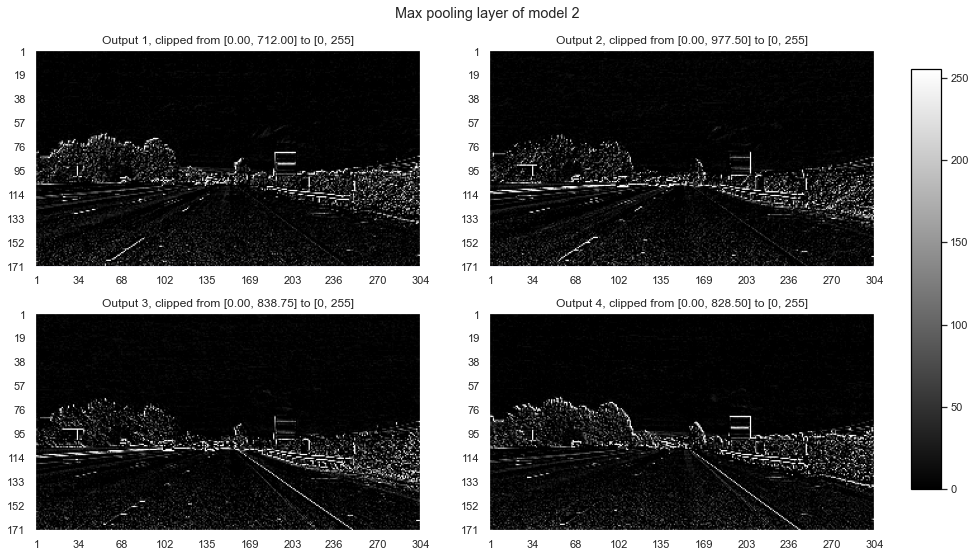

In [69]:
conv_layer3, activated_layer3, pooling_layer3 = model_3(image_tensor)
conv_layer4, activated_layer4, pooling_layer4 = model_4(image_tensor)
u6.visualize_cnn_layer(pooling_layer3, title="Max pooling layer of model 1", clip=True)
u6.visualize_cnn_layer(activated_layer4, title="Max pooling layer of model 2", clip=True)

<div class="alert alert-warning">
    <b>Exercise 3.5. [4 Points]</b>
    <ul>
        <li>Which parts of the image are highlighted? Do you observe any differences between striding and max pooling? Do you observe any differences between the two pooling sizes and the two stride values?</li>
    </ul>
</div>

your answer goes here

<h2>Exercise 4</h2>

As you are now an expert in defining and applying custom kernels, we will now move on to learning kernels to create more expressive systems. 

Following the instruction given in the lecture notebook, perform the tasks below, but this time, using the <b>CIFAR10</b> dataset (more information about the dataset can be found here: https://www.cs.toronto.edu/~kriz/cifar.html).

To load the CIFAR10 dataset and take a look at a preview of $10$ samples, run the cell below. The CIFAR10 dataset contains RGB images with a resolution of $32 \times 32$ pixels from $10$ different classes. 

**Important:** The first time you run this, it will download the dataset. You may see a <code>UserWarning: The given NumPy array is not writeable</code>. This can be safely ignored. The download itself might take a couple of minutes.

Files already downloaded and verified
Files already downloaded and verified


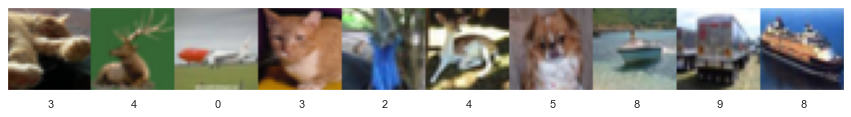

In [70]:
# load the dataset with custom batch size
train_loader, valid_loader, test_loader = u6.get_dataset(
    variant="CIFAR10",
    root="resources",
    batch_size=10,
    valid_size=0.1
)

# load the first batch of data (set seed for reproducibility)
u6.set_seed(22)
images, labels = next(iter(train_loader))
# transform the image shapes and normalize their values ([0, 1]) for visualization purposes
images = np.concatenate([img.squeeze() for img in images], axis=2).transpose(1, 2, 0)
images = (images - images.min()) / (images.max() - images.min())

# display the first batch of data
with plt.style.context({"axes.grid": False, "xtick.bottom": False}):
    plt.figure(figsize=(15, 2))
    plt.imshow(images)
    plt.xticks(16 + np.arange(len(labels)) * 32, labels.numpy())
    plt.yticks([])

<div class="alert alert-warning">
    <b>Exercise 4.1. [3 Points]</b>
    <ul>
        <li>Reload the CIFAR10 dataset with a batch size of $32$ and considering $15\%$ of the samples as validation set.</li>
    </ul>
</div>

In [71]:
train_loader, valid_loader, test_loader = u6.get_dataset(
    variant="CIFAR10",
    root="resources",
    batch_size=32,
    valid_size=0.15
)

Files already downloaded and verified
Files already downloaded and verified


<div class="alert alert-warning">
    <b>Exercise 4.2. [13 Points]</b>
    <ul>
        <li>Create and train a model according to the MNIST example provided in the notebook from the lecture. Keep the structure (ordering and number of layers) and hyperparameters if not stated otherwise. Change the model in a way that:</li>
        <ul>
            <li>it can process the RGB images from the CIFAR10 dataset as input</li>
            <li>its convolutional layer applies kernels with size $5$ and outputs $12$ feature maps</li>
            <li>max pooling applies kernels with size $2$</li>
            <li>the number of inputs of the linear layer is adapted correctly after flattening the feature maps</li>
            <li>its first fully connected layer consists of $100$ neurons</li>
        </ul>
        <li>Define the loss function.</li>
        <li>Then, train the model with the following hyperparameters: iterations = $4$; momentum = $0.1$; and learning rate = $0.1$. Use the function <code>run_gradient_descent()</code> from <code>u6_utils.py</code>.</li>
        <li>For reproducibility, set a fixed seed (seed=22). It must be set both before defining the model and before the optimization (in which random samples are drawn). Otherwise, changes in the model would change the train/validation split samples, since both steps use randomization.</li>
    </ul>
</div>

In [74]:
#train_loader, valid_loader, test_loader = u6.get_dataset(variant="MNIST", root="resources", batch_size=20, valid_size=0.1)
u6.set_seed(seed=22)

# Reload the CIFAR10 dataset with a batch size of  32  and considering  15%  of the samples as validation set.
# train_loader, valid_loader, test_loader = u6.get_dataset(
#     variant="MNIST",
#     root="resources",
#     batch_size=32,
#     valid_size=0.15
# )

model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5),  # conv layer: size changes from (3, 32, 32) to (12, 28, 28); 28 because kernel with size 5 must fit 2 pixels left+right (top+bottom)
    torch.nn.ReLU(),                                                 # nonlinearity
    torch.nn.MaxPool2d(kernel_size=2),                               # max pooling layer: size changes from (12, 28, 28) to (12, 14, 14)
    torch.nn.Flatten(),                                              # flatten activation maps: size changes from (12, 14, 14) to 1D shape of size (3024)
    torch.nn.Linear(in_features=12 * 14 * 14, out_features=100),                                # first fully connected layer
    torch.nn.ReLU(),                                                 # nonlinearity
    torch.nn.Linear(in_features=100, out_features=10)                                         # output layer
)

# Define the loss function
loss = torch.nn.CrossEntropyLoss()

# Minimize the given loss for our CNN model (set seed for reproducibility)
u6.set_seed(seed=22)
losses = u6.run_gradient_descent(
    model=model,
    loss=loss,
    training_set=train_loader,
    valid_set=valid_loader,
    iterations=4,
    learning_rate=0.1,
    momentum=0.1,
    use_cuda_if_available=True
)

  0%|          | 0/42500 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 1.817970 and validation loss: 2.451308
Epoch  2 finished with training loss: 1.511200 and validation loss: 1.585756
Epoch  3 finished with training loss: 1.340480 and validation loss: 1.887036
Epoch  4 finished with training loss: 1.211209 and validation loss: 1.610771


<div class="alert alert-warning">
    <b>Exercise 4.3. [3 Points]</b>
    <ul>
        <li>Plot the training and validation losses and print the accuracy on the test set.</li>
    </ul>
</div>

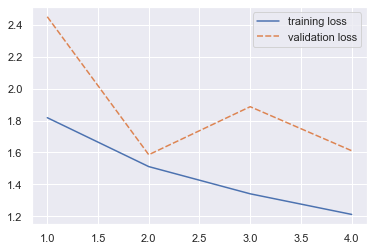

Training set:
{'loss': 1.2381475827494808, 'accuracy': 0.5860844620015049}
Test set:
{'loss': 1.6119317105783821, 'accuracy': 0.49790335463258784}


In [75]:
sns.lineplot(data=losses)
plt.show()

print("Training set:")
print(u6.evaluate_model(model, train_loader, loss=loss, accuracy=u6.multiclass_accuracy))
print("Test set:")
print(u6.evaluate_model(model, test_loader, loss=loss, accuracy=u6.multiclass_accuracy))

<div class="alert alert-warning">
    <b>Exercise 4.4. [2 Points]</b>
    <ul>
        <li>Plot the filters from the convolutional layer (layer 0).</li>
    </ul>
</div>

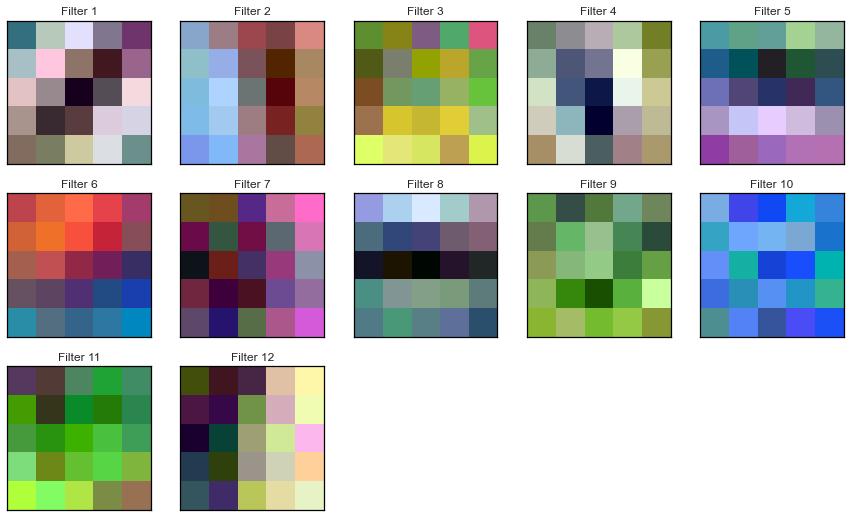

In [76]:
u6.visualize_cnn_filters(model[0], ncols=5)

<div class="alert alert-warning">
    <b>Exercise 4.5. [2 Points]</b>
    <ul>
        <li>What kind of different structures (or textures) in an image might your CNN detect with these filters?</li>
    </ul>
</div>

your answer goes here

<h2>Exercise 5</h2>

<div class="alert alert-warning">
    <b>Exercise 5.1. [3 Points]</b>
    <ul>
        <li>Reload the CIFAR10 dataset with $15\%$ validation data (the choice of other parameters is up to you).</li>
    </ul>
</div>

In [ ]:
# your code goes here

<div class="alert alert-warning">
    <b>Exercise 5.2. [20 Points]</b>
    <ul>
        <li>Create a model similar to the model from exercise 4. The architecture design is completely up to you.</li>
        <li>Define the loss function.</li>
        <li>Train the model by using the function <code>run_gradient_descent()</code> from <code>u6_utils.py</code> and choose some appropriate hyperparameters.</li>
        <li>Can you optimize the model in order to achieve an accuracy on the test set > $70\%$? Plot the training and validation losses to show that your model does not overfit to the training data and print out the accuracy on the test to show that it is better than $70\%$.</li>
        <li>For optimization, you can vary several hyperparameters, e.g.: batch size, iterations, learning rate, momentum, number of layers, number of kernels/neurons, and type of non-linearity. Also different types of layers are allowed, e.g., <a href="https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html"><code>torch.nn.Dropout()</code></a>. You may also try randomly flipping training images to perform data augmentation (provided by <code>u6.get_dataset()</code>). Do <b>not</b> vary the validation set size, as that would change the training set size.</li>
        <li>For reproducibility, set a fixed seed (seed=22). It must be set both before defining the model and before the optimization (in which random samples are drawn). Otherwise, changes in the model would change the train/validation split samples, since both steps use randomization.</li>
    </ul>
</div>

In [ ]:
# your code goes here